In [498]:
#Split-Module
import pandas as pd
import numpy as np
import random
import copy
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [620]:
pwd

'/Users/suraj/personality'

In [499]:
!ls

Personality-prediction-system test.csv
data visualization.ipynb      train dataset.csv
dataset.csv                   train.csv
split.py


In [579]:
df = pd.read_csv('./train dataset.csv')

In [580]:
df1 = pd.read_csv('./test.csv')

In [581]:
df1.head()

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (Class label),split
0,Female,22,5,6,7,4,3,extraverted,-0.546277
1,Male,18,5,7,7,6,4,lively,-1.860887
2,Male,18,5,7,5,6,7,dependable,0.507700
3,Female,19,5,5,4,5,4,responsible,0.203347
4,Male,19,5,6,4,6,3,extraverted,1.135883


In [582]:
dataset=[]
gender = df['Gender']
age = df['Age']
openness = df['openness']
neuroticism = df['neuroticism']
conscientiousness = df['conscientiousness']
agreeableness = df['agreeableness']
extraversion = df['extraversion']
label = df['Personality (Class label)']




In [583]:
dataset1=[]
gender1 = df1['Gender']
age1 = df1['Age']
openness1 = df1['openness']
neuroticism1= df1['neuroticism']
conscientiousness1 = df1['conscientiousness']
agreeableness1 = df1['agreeableness']
extraversion1 = df1['extraversion']
label1 = df1['Personality (Class label)']



In [584]:
test_length = len(gender1)

In [585]:
test_length

234

In [586]:
gender = gender.tolist() + gender1.tolist()
age = age.tolist() + age1.tolist()
openness = openness.tolist() + openness1.tolist()
neuroticism = neuroticism.tolist() + neuroticism1.tolist()
conscientiousness = conscientiousness.tolist() + conscientiousness1.tolist()
agreeableness = agreeableness.tolist() + agreeableness1.tolist()
extraversion = extraversion.tolist() + extraversion1.tolist()
label = label.tolist() + label1.tolist()

In [587]:
label = label
print("Classes :",list(set(label)))


Classes : ['responsible', 'serious', 'extraverted', 'lively', 'dependable']


In [588]:
length_label = len(label)

In [589]:
len(label)

943

In [590]:
def filter(label,gender,age,openness,neuroticism,conscientiousness,agreeableness,extraversion):
    responsible_list= []
    serious_list=[]
    extraverted_list=[]
    lively_list=[]
    dependable_list=[]
    for i in range(len(label)):
        if label[i]=="responsible":
            temp=[]
            temp.append(gender[i])
            temp.append(age[i])
            temp.append(openness[i])
            temp.append(neuroticism[i])
            temp.append(conscientiousness[i])
            temp.append(agreeableness[i])
            temp.append(extraversion[i])
            responsible_list.append(temp)
        if label[i]=="serious":
            temp=[]
            temp.append(gender[i])
            temp.append(age[i])
            temp.append(openness[i])
            temp.append(neuroticism[i])
            temp.append(conscientiousness[i])
            temp.append(agreeableness[i])
            temp.append(extraversion[i])
            serious_list.append(temp)
        if label[i]=="extraverted":
            temp=[]
            temp.append(gender[i])
            temp.append(age[i])
            temp.append(openness[i])
            temp.append(neuroticism[i])
            temp.append(conscientiousness[i])
            temp.append(agreeableness[i])
            temp.append(extraversion[i])
            extraverted_list.append(temp)
        if label[i]=="lively":
            temp=[]
            temp.append(gender[i])
            temp.append(age[i])
            temp.append(openness[i])
            temp.append(neuroticism[i])
            temp.append(conscientiousness[i])
            temp.append(agreeableness[i])
            temp.append(extraversion[i])
            lively_list.append(temp)
        if label[i]=="dependable":
            temp=[]
            temp.append(gender[i])
            temp.append(age[i])
            temp.append(openness[i])
            temp.append(neuroticism[i])
            temp.append(conscientiousness[i])
            temp.append(agreeableness[i])
            temp.append(extraversion[i])
            dependable_list.append(temp)

    return responsible_list,serious_list,extraverted_list,lively_list,dependable_list




In [591]:
responsible_list,serious_list,extraverted_list,lively_list,dependable_list = filter(label,gender,age,openness
                                                                                    ,neuroticism,
                                                                                    conscientiousness,
                                                                                    agreeableness,extraversion)

In [592]:
dependable_list.append(['Female', 18, 7, 6, 4, 5, 5])

In [593]:
print("Data points in each class: ",len(responsible_list),len(serious_list),len(extraverted_list),
      len(lively_list),len(dependable_list))

Data points in each class:  176 215 200 177 176


# Random indices selection

In [549]:
def random_selection(source_num,label,list_label,target_num):
    label = [i for i in range(source_num)]
    random_label = random.sample(label,target_num)
    
    list_label = [list_label[random_label[i]] for i in range(len(random_label))]
    return list_label

In [550]:
###No need to do for responsible class
# Serious label
serious_list_main = random_selection(len(serious_list),label,serious_list,len(responsible_list))
#Extraverted list

extraverted_list_main = random_selection(len(extraverted_list),label,extraverted_list,len(responsible_list))

##Lively list

lively_list_main = random_selection(len(lively_list),label,lively_list,len(responsible_list))

##Dependable List
dependable_list_main = random_selection(len(dependable_list),label,dependable_list,len(responsible_list))
responsible_list_main = copy.deepcopy(responsible_list)

In [551]:
#Converting Male =0 and Female =1
def converter(data_point):
    temp=[]
    if data_point[0]=='Male':
        temp.append(0)
    else:
        temp.append(1)
    
    data = data_point[1:]
    temp = temp+data
    return temp
    

In [552]:
def converter_data(data_list):
    temp=[]
    for i in range(len(data_list)):
        temp.append(converter(data_list[i]))
    return temp

In [553]:
print("Example for Converter function ",converter(['Male', 20, 1, 2, 7, 6, 4]))

Example for Converter function  [0, 20, 1, 2, 7, 6, 4]


In [554]:
responsible_list_main = converter_data(responsible_list_main)

In [555]:
serious_list_main = converter_data(serious_list_main)
lively_list_main = converter_data(lively_list_main)
dependable_list_main = converter_data(dependable_list_main)
extraverted_list_main = converter_data(extraverted_list_main)


In [556]:
#resposible =0 extra 1 serious 2 lively 3 dependable 4 
dataset_main=[]
for i in responsible_list_main:
    
    dataset_main.append(i + [0])
for i in extraverted_list_main:
    
    dataset_main.append(i + [1])
for i in serious_list_main:
    
    dataset_main.append(i + [2])
for i in lively_list_main:
    
    dataset_main.append(i + [3])
for i in dependable_list_main:
    
    dataset_main.append(i + [4])


# Training the data

In [557]:
dataset_train = random.sample(dataset_main,len(dataset_main))

In [558]:
Normalised_attrs = []
for i in range(len(dataset_train)):
    Normalised_attrs.append(dataset_train[i][1:7])


scaler = StandardScaler()
Normalised_attrs = scaler.fit_transform(Normalised_attrs)

In [559]:
temp=[]
for i in range(len(Normalised_attrs)):
   
    temp.append(list([dataset_train[i][0]])+list(Normalised_attrs[i])+list([dataset_train[i][-1]]))


In [562]:
len(data_points)

880

In [560]:
universal_data = copy.deepcopy(temp)

In [561]:
data_points=[]
data_targets=[]
for i in universal_data:
    data_points.append(i[:7])
    data_targets.append(i[7])

In [564]:
train = data_points[:709]
label_train = data_targets[:709]
test = data_points[709:]
label_test = data_targets[709:]

In [566]:
clf = svm.SVC(kernel='rbf', C=1)

In [568]:
train=np.array(train)
label_train = np.array(label_train)

In [434]:
# scaled = preprocessing.scale(data_points)

In [569]:
model  = clf.fit(train,label_train)

In [617]:
label_set  = list(set(label))

In [618]:
personality={}
for i in range(5):
    personality[i]=label_set[i]

# Predict

In [575]:
predict_label = model.predict(test)

In [578]:
print("Accuracy of Model : ",model.score(test,label_test)*100)

Accuracy of Model :  25.146198830409354


In [595]:
data_point=['Female', 19, 5, 5, 4, 5, 4]


In [613]:
def predict_datapoint(model,datapoint):
    temp=[]
    if datapoint[0]=="Male":
        temp.append(0)
    else:
        temp.append(1)
    data = scaler.transform([datapoint[1:]])
    temp = temp + data.reshape(data.shape[1]).tolist()
#     print(temp)
    label = model.predict(np.array([temp]))
    return label[0]

In [619]:
print("Predicted Personality : ",personality[predict_datapoint(model, data_point)])

Predicted Personality :  responsible


# Visualization 

In [445]:
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(data_points)

In [446]:
df_subset = pd.DataFrame()

In [447]:
df_subset['tsne-pca50-one'] = tsne_pca_results[:,0]
df_subset['tsne-pca50-two'] = tsne_pca_results[:,1]

In [448]:
tsne_pca_results.shape

(630, 2)

In [449]:
plt.figure(figsize=(16,4))

<Figure size 1152x288 with 0 Axes>

<Figure size 1152x288 with 0 Axes>

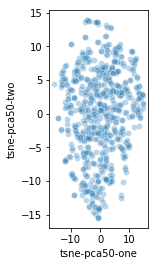

In [450]:
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-pca50-one", y="tsne-pca50-two",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax3
)

In [ ]:

df = pd.read_csv('C:/Users/Dell/Desktop/Vivek/Pscript/train dataset.csv')
df['split'] = np.random.randn(df.shape[0], 1)

msk = np.random.rand(len(df)) <= 0.7

train = df[msk]
test = df[~msk]
train.to_csv('train.csv', index=False)
print("Train.csv file  created")
test.to_csv('test.csv', index=False)
print("Test.csv file created")

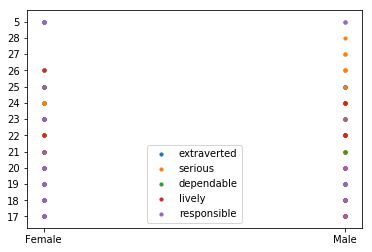

In [6]:
#Data-Visualization
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def load_data(path, header):
    marks_df = pd.read_csv(path, header=header)
    return marks_df


if __name__ == "__main__":
    # load the data from the file
    data = load_data("test dataset.csv", None)

    # X = feature values, all the columns except the last column
    X = data.iloc[:, :-1]

    # y = target values, last column of the data frame
    y = data.iloc[:, -1]

    # filter out the applicants that got admitted
    extraverted = data.loc[y == 'extraverted']

    # filter out the applicants that din't get admission
    serious = data.loc[y == 'serious']
    dependable = data.loc[y == 'dependable']
    lively = data.loc[y == 'lively']
    responsible = data.loc[y == 'responsible']

    # plots
    plt.scatter(extraverted.iloc[:, 0], extraverted.iloc[:, 1], s=10, label='extraverted')
    plt.scatter(serious.iloc[:, 0], serious.iloc[:, 1], s=10, label='serious')
    plt.scatter(dependable.iloc[:, 0], dependable.iloc[:, 1], s=10, label='dependable')
    plt.scatter(lively.iloc[:, 0], lively.iloc[:, 1], s=10, label='lively')
    plt.scatter(responsible.iloc[:, 0], responsible.iloc[:, 1], s=10, label='responsible')
    
    plt.legend()
    plt.show()

In [4]:
#Model-Training 
import pandas as pd
from numpy import *
import numpy as np
from sklearn import preprocessing
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn import neighbors

data =pd.read_csv('train dataset.csv')
array = data.values

for i in range(len(array)):
	if array[i][0]=="Male":
		array[i][0]=1
	else:
		array[i][0]=0


df=pd.DataFrame(array)

maindf =df[[0,1,2,3,4,5,6]]
mainarray=maindf.values
print (mainarray)


temp=df[7]
train_y =temp.values
# print(train_y)
# print(mainarray)
train_y=temp.values

for i in range(len(train_y)):
	train_y[i] =str(train_y[i])



mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg',max_iter =1000)
mul_lr.fit(mainarray, train_y)

testdata =pd.read_csv('test dataset.csv')
test = testdata.values

for i in range(len(test)):
	if test[i][0]=="Male":
		test[i][0]=1
	else:
		test[i][0]=0


df1=pd.DataFrame(test)

testdf =df1[[0,1,2,3,4,5,6]]
maintestarray=testdf.values
print(maintestarray)

y_pred = mul_lr.predict(maintestarray)
for i in range(len(y_pred)) :
	y_pred[i]=str((y_pred[i]))
DF = pd.DataFrame(y_pred,columns=['Predicted Personality'])
DF.index=DF.index+1
DF.index.names = ['Person No']
DF.to_csv("output.csv")

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[[1 17 7 ... 7 3 2]
 [1 19 4 ... 4 6 6]
 [0 18 7 ... 4 5 5]
 ...
 [1 22 5 ... 3 6 1]
 [1 19 5 ... 5 7 5]
 [0 18 5 ... 7 6 5]]
[[0 20 7 ... 9 5 5]
 [1 17 5 ... 5 2 4]
 [0 25 5 ... 7 2 4]
 ...
 [1 18 7 ... 6 2 7]
 [1 23 6 ... 5 4 3]
 [0 18 5 ... 3 5 6]]


In [1]:
print('''  --------------------------------------------------
           ---- WELCOME TO PERSONALITY PREDICTION SYSTEM ----
           --------------------------------------------------

          Take this psychology test to find out about your personality!
          This test measures what many psychologists consider to be
          the five fundamental dimensions of personality.

''')
print(" To start quiz enter your name \n")
UserName = input()
print(" Enter Age: \n")
Age = int(input())
print(" Enter Gender : \n")
Gender = input()

def Evaluate():
    print(''' 
               1. Strongly disagree
               2. Disagree
               3. Neither disagree nor agree
               4. Agree
               5. Strongly agree 
         ''')
    print("\n Enter Your Choice ")
    Value = int(input())
    if Value==1:
        return 0
    if Value==2:
        return 0.25
    if Value==3:
        return 0.5
    if Value==4:
        return 0.75
    if Value==5:
        return 1
    else:
        return 0
    
def StartQuiz():
    print(''' Directions: The following statements concern your perception about yourself
                in a variety of situations. Your task is to indicate the strength
                of your agreement with each statement, utilizing a scale in which
                1 denotes strong disagreement, 5 denotes strong agreement, and 2,
                3, and 4 represent intermediate judgments.
                Submit a number from 1 to 5 from the following scale:

    1. Strongly disagree
    2. Disagree
    3. Neither disagree nor agree
    4. Agree
    5. Strongly agree ''')
    Choice=1;
    Extraversion=0;Agreeableness=0;Conscientiousness=0;Neuroticism=0;Openness=0;
    while Choice:
        print('''1. I see as my self as one who is talkative
               ''')
        Extraversion=Extraversion+Evaluate()
        print('''2. I see as my self as one who tends to find fault with others
               ''')
        Agreeableness=Agreeableness+Evaluate()
        print('''3. I see as my self as one who does a through job
               ''')
        Conscientiousness=Conscientiousness+Evaluate()
        
        print('''4. I see as my self as one who is depressed, blue.
               ''')
        Neuroticism=Neuroticism+Evaluate()
        print('''5. I see as my self as one who is original, come up with new ideas.
               ''')
        Openness=Openness+Evaluate()
        print('''6. I see as my self as one who is reserved
               ''')
        Extraversion=Extraversion+Evaluate()
        print('''7. I see as my self as one who is helpful and unselfish with others
              ''')
        Agreeableness=Agreeableness+Evaluate()
        print('''8. I see as my self as one who can be somewhat careless
               ''')
        Conscientiousness=Conscientiousness+Evaluate()
        print('''9. I see as my self as one who is relaxed, handles stress very well.
               ''')
        Neuroticism=Neuroticism+Evaluate()
        print('''10. I see as my self as one who is curious about many different things.
              ''')
        Openness=Openness+Evaluate()
        print('''11. I see as my self as one who is full of energy
               ''')
        Extraversion=Extraversion+Evaluate()
        print('''12. I see as my self as one who starts quarrel with others
               ''')
        Agreeableness=Agreeableness+Evaluate()
        print('''13. I see as my self as one who is a reliable worker
               ''')
        Conscientiousness=Conscientiousness+Evaluate()
        print('''14. I see as my self as one who can be tense
               ''')
        Neuroticism=Neuroticism+Evaluate()
        print('''15. I see as my self as one who is ingenious a deep thinker
               ''')
        Openness=Openness+Evaluate()
        print('''16. I see as my self as one who generates a lot of enthusiasm
               ''')
        Extraversion=Extraversion+Evaluate()
        print('''17. I see as my self as one who has a forgiving nature               ''')
        Agreeableness=Agreeableness+Evaluate()
        print('''18. I see as my self as one who tend to be disorganized
               ''')
        Conscientiousness=Conscientiousness+Evaluate()
        print('''19. I see as my self as one who worries a lot
              ''')
        Neuroticism=Neuroticism+Evaluate()
        print('''20. I see as my self as one who has an active imagination
               ''')
        Openness=Openness+Evaluate()
        print('''21. I see as my self as one who tend to be quiet.

               ''')
        Extraversion=Extraversion+Evaluate()
        print('''22. I see as my self as one who is generally trusting
              ''')
        Agreeableness=Agreeableness+Evaluate()
        print('''23. I see as my self as one who tends to be lazy
               ''')
        Conscientiousness=Conscientiousness+Evaluate()
        print('''24. I see as my self as one who is emotionally stable not easily upset
               ''')
        Neuroticism=Neuroticism+Evaluate()
        print('''25. I see as my self as one who is inventive
               ''')
        Openness=Openness+Evaluate()
        print('''26. I see as my self as one who has an assertive personality
               ''')
        Extraversion=Extraversion+Evaluate()
        print('''27. I see as my self as one who can be cold and aloof
               ''')
        Agreeableness=Agreeableness+Evaluate()
        print('''28. I see as my self as one who preserves until the task is finished
               ''')
        Conscientiousness=Conscientiousness+Evaluate()
        print('''29. I see as my self as one who can be moody
               ''')
        Neuroticism=Neuroticism+Evaluate()
        print('''30. I see as my self as one who values artistic, aesthetic experience
               ''')
        Openness=Openness+Evaluate()
        print('''31. I see as my self as one who is sometimes shy, inhibited
              ''')
        Extraversion=Extraversion+Evaluate()
        print('''32. I see as my self as one who is considerate and kind to almost everyone
               ''')
        Agreeableness=Agreeableness+Evaluate()
        print('''33. I see as my self as one who does things efficiently
              ''')
        Conscientiousness=Conscientiousness+Evaluate()
        print('''34. I see as my self as one who remains calm in tense situations
              ''')
        Neuroticism=Neuroticism+Evaluate()
        print('''35. I see as my self as one who prefers to work that is routine
               ''')
        Openness=Openness+Evaluate()
        print('''36. I see as my self as one who is outgoing, sociable
              ''')
        Extraversion=Extraversion+Evaluate()
        print('''37. I see as my self as one who is sometimes rude to others
               ''') 
        Agreeableness=Agreeableness+Evaluate()
        print('''38. I see as my self as one who makes plans and follows through with them.
              ''') 
        Conscientiousness=Conscientiousness+Evaluate()
        print('''39. I see as my self as one who gets nervous easily
              ''')
        Neuroticism=Neuroticism+Evaluate()
        print('''40. I see as my self as one who likes to reflect plays with ideas.
               ''')
        Openness=Openness+Evaluate()
        print('''41. I see as my self as one who has a few artistic interests
               ''')
        Openness=Openness+Evaluate()
        print('''42. I see as my self as one who likes to cooperate with others
               ''')
        Agreeableness=Agreeableness+Evaluate()
        print('''43. I see as my self as one who is easily distracted.
               ''')
        Conscientiousness=Conscientiousness+Evaluate()
        print('''44. I see as my self as one who is sophisticated in arts, music or literature.
               ''')
        Openness=Openness+Evaluate()
        print('\n\n Congrats '+UserName+' for successfully completing this test \n\n -------Your 
              Big 5 trait Score -------- \n\n')
        print('Extraversion '+str(Extraversion)+'\n Agreeableness '+str(Agreeableness)+'\n 
              Conscientiousness '+str(Conscientiousness)+'\n Neuroticism '+str(Neuroticism)+'\n Openness 
              '+str(Openness))
        Choice=0
            
         
        


print("\n \n Hello "+UserName+" Your details are as follows \n Age "+str(Age)+"\n Gender "+Gender)
print("You can start the test now \n")
StartQuiz()
    

  --------------------------------------------------
           ---- WELCOME TO PERSONALITY PREDICTION SYSTEM ----
           --------------------------------------------------

          Take this psychology test to find out about your personality!
          This test measures what many psychologists consider to be
          the five fundamental dimensions of personality.


 To start quiz enter your name 

Yash 
 Enter Age: 

19
 Enter Gender : 

male

 
 Hello Yash  Your details are as follows 
 Age 19
 Gender male
You can start the test now 

 Directions: The following statements concern your perception about yourself
                in a variety of situations. Your task is to indicate the strength
                of your agreement with each statement, utilizing a scale in which
                1 denotes strong disagreement, 5 denotes strong agreement, and 2,
                3, and 4 represent intermediate judgments.
                Submit a number from 1 to 5 from the following sca

4
27. I see as my self as one who can be cold and aloof
               
 
               1. Strongly disagree
               2. Disagree
               3. Neither disagree nor agree
               4. Agree
               5. Strongly agree 
         

 Enter Your Choice 
2
28. I see as my self as one who preserves until the task is finished
               
 
               1. Strongly disagree
               2. Disagree
               3. Neither disagree nor agree
               4. Agree
               5. Strongly agree 
         

 Enter Your Choice 
4
29. I see as my self as one who can be moody
               
 
               1. Strongly disagree
               2. Disagree
               3. Neither disagree nor agree
               4. Agree
               5. Strongly agree 
         

 Enter Your Choice 
2
30. I see as my self as one who values artistic, aesthetic experience
               
 
               1. Strongly disagree
               2. Disagree
               3. Neither di